In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from isaac.visualization import plot_lineplot_with_paper_style
from isaac.statistical_tests import is_best_model_significantly_better

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
directory = "features_plots/"
feature_stats = pd.read_hdf(directory+"stats.h5")

In [4]:
baseline_stats = pd.read_hdf("remove_initialisation_effects/stats.h5")
baseline_stats.seed = baseline_stats.seed.astype(int)
baseline_stats = baseline_stats.query("seed < 3")
baseline_stats["features"] = "baseline"

In [5]:
stats = pd.concat([feature_stats, baseline_stats])

In [6]:
stats = stats[stats.Epoch < 25]

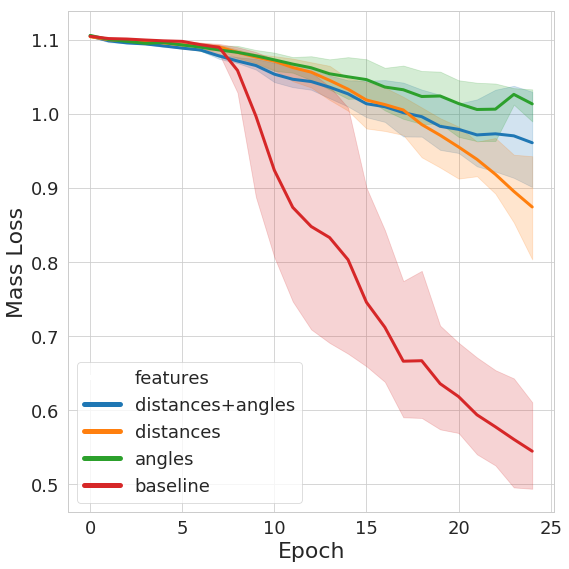

In [7]:
ax = plot_lineplot_with_paper_style(None, x="Epoch", y="Mass Loss", data=stats, hue="features")
plt.savefig(directory+"mass_losses.pdf")

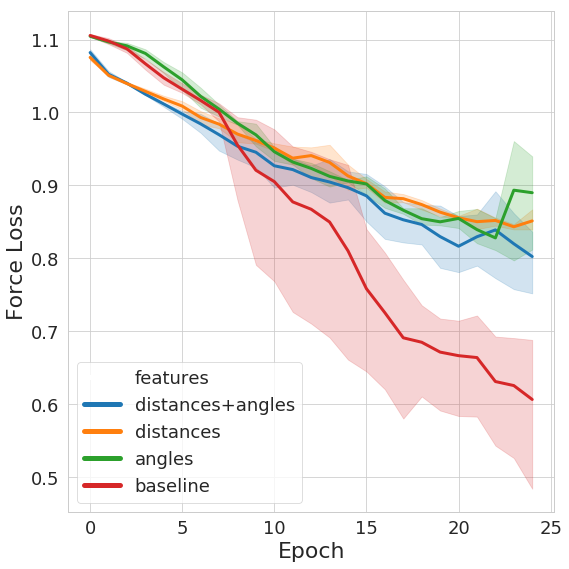

In [8]:
ax = plot_lineplot_with_paper_style(None, x="Epoch", y="Force Loss", data=stats, hue="features")
plt.savefig(directory+"force_losses.pdf")

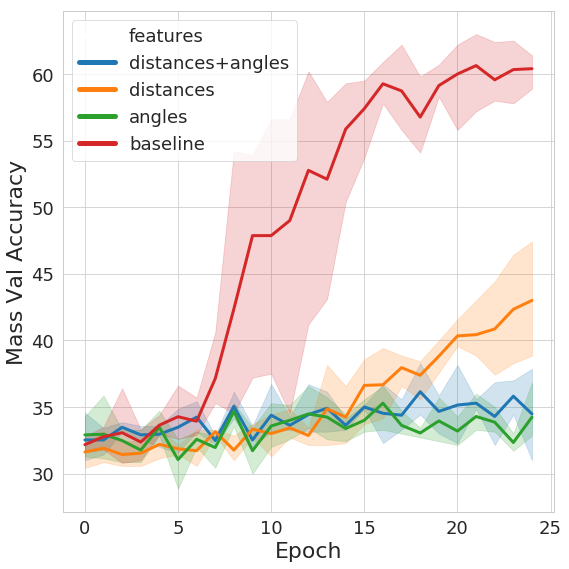

In [9]:
ax = plot_lineplot_with_paper_style(None, x="Epoch", y="Mass Val Accuracy", data=stats, hue="features")
plt.savefig(directory+"mass_val_accuracies.pdf")

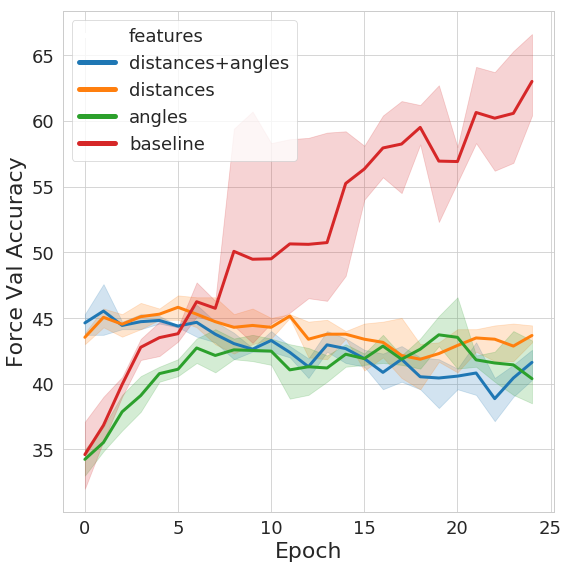

In [10]:
ax = plot_lineplot_with_paper_style(None, x="Epoch", y="Force Val Accuracy", data=stats, hue="features")
plt.savefig(directory+"force_val_accuracies.pdf")

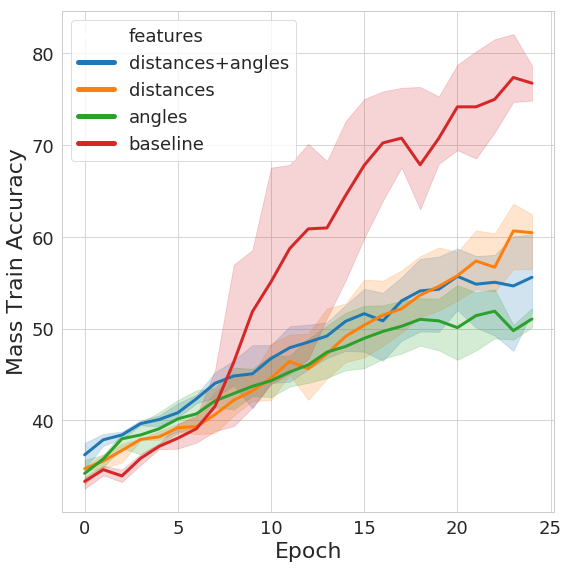

In [11]:
ax = plot_lineplot_with_paper_style(None, x="Epoch", y="Mass Train Accuracy", data=stats, hue="features")
plt.savefig(directory+"mass_train_accuracies.pdf")

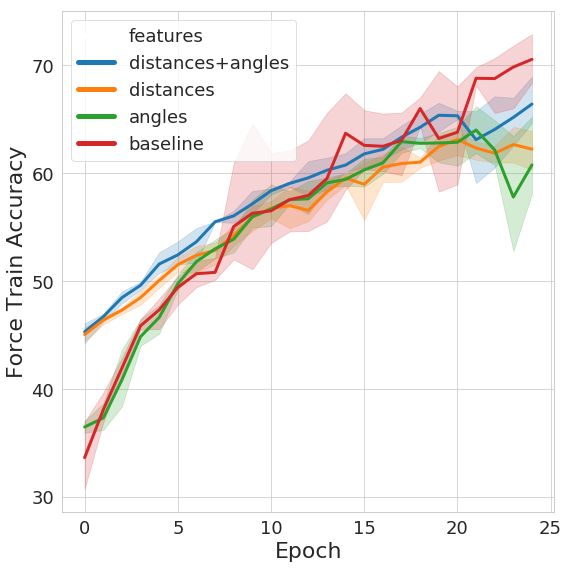

In [12]:
ax = plot_lineplot_with_paper_style(None, x="Epoch", y="Force Train Accuracy", data=stats, hue="features")
plt.savefig(directory+"force_train_accuracies.pdf")

In [13]:
feature_mass_accuracies = []
feature_force_accuracies = []

for feature_group, feature_df in stats.groupby("features"):
    mass_accuracies = []
    force_accuracies = []
    for _, seed_df in feature_df.groupby("seed"):
        mass_accuracies.append(seed_df["Mass Val Accuracy"].max())
        force_accuracies.append(seed_df["Force Val Accuracy"].max())

    feature_mass_accuracies.append((feature_group, mass_accuracies))
    feature_force_accuracies.append((feature_group, force_accuracies))

    print(feature_group)
    print("Mass: %.2f $\pm$ %.2f" % (np.mean(mass_accuracies), np.std(mass_accuracies)))
    print("Force: %.2f $\pm$ %.2f" % (np.mean(force_accuracies), np.std(force_accuracies)))

angles
Mass: 36.43 $\pm$ 0.42
Force: 44.95 $\pm$ 1.41
baseline
Mass: 61.30 $\pm$ 1.75
Force: 63.00 $\pm$ 2.63
distances
Mass: 43.38 $\pm$ 3.07
Force: 46.19 $\pm$ 0.41
distances+angles
Mass: 37.00 $\pm$ 1.05
Force: 46.10 $\pm$ 1.17


In [14]:
is_best_model_significantly_better(feature_mass_accuracies)
is_best_model_significantly_better(feature_force_accuracies)

baseline is significantly better than the rest
baseline is significantly better than the rest
